In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

gender = pd.read_csv("data/gender_submission.csv")
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train.isnull().sum()
train["Sex"].value_counts()
sns.countplot(x = "SibSp", data = train)

In [ ]:
train["Died"] = 1-train["Survived"]
train.head()

In [ ]:
below_30 = train[(train["Survived"] == 1) & (train["Age"] <= 30)]

# 30대 이하의 살아남은 남성과 여성의 표
sns.countplot(x = "Pclass",  data = train)

<AxesSubplot:xlabel='Sex', ylabel='count'>

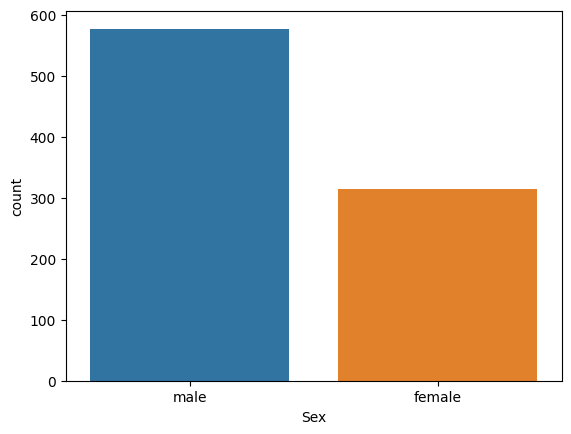

In [60]:
sns.countplot(x="Sex", data = train)